# Embeddings

https://www.youtube.com/watch?v=wSXGlvTR9UM

In [1]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/wSXGlvTR9UM?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')



In [2]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Merge, Flatten

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
df = pd.read_csv('../data/cmc.data',header=None,names=['Age','Education','H_education',
                                                     'num_child','Religion', 'Employ',
                                                     'H_occupation','living_standard',
                                                     'Media_exposure','contraceptive'])
df.head()

,Age,Education,H_education,num_child,Religion,Employ,H_occupation,living_standard,Media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [4]:
df.isnull().any()

Age                False
Education          False
H_education        False
num_child          False
Religion           False
Employ             False
H_occupation       False
living_standard    False
Media_exposure     False
contraceptive      False
dtype: bool

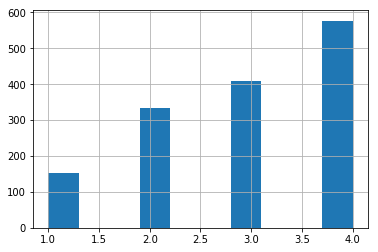

In [5]:
df.Education.hist()

In [6]:
df.shape

(1473, 10)

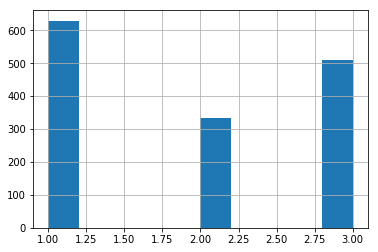

In [7]:
df.contraceptive.hist()

In [8]:
df.dtypes

Age                int64
Education          int64
H_education        int64
num_child          int64
Religion           int64
Employ             int64
H_occupation       int64
living_standard    int64
Media_exposure     int64
contraceptive      int64
dtype: object

In [9]:
def one_hot_encoding(idx):
    y = np.zeros((len(idx),max(idx)+1))
    y[np.arange(len(idx)), idx] = 1
    return y

In [10]:
scaler = StandardScaler()
df[['Age','num_child']] = scaler.fit_transform(df[['Age','num_child']]) 

In [11]:
x = df[['Age','num_child','Employ','Media_exposure']].values
y = one_hot_encoding(df.contraceptive.values-1)

liv_cats = df.living_standard.max()
edu_cats = df.Education.max()

liv = df.living_standard.values - 1
liv_one_hot = one_hot_encoding(liv)
edu = df.Education.values - 1
edu_one_hot = one_hot_encoding(edu)

train_x, test_x, train_liv, \
test_liv, train_edu, test_edu, train_y, test_y = train_test_split(x,liv_one_hot,edu_one_hot,y,test_size=0.1, random_state=1)

In [12]:
train_x = np.hstack([train_x, train_edu, train_liv])
test_x = np.hstack([test_x, test_edu, test_liv])

In [13]:
train_x.shape

(1325, 12)

In [14]:
train_edu.shape

(1325, 4)

In [15]:
train_liv.shape

(1325, 4)

In [16]:
train_x.shape

(1325, 12)

In [17]:
model = Sequential()
model.add(Dense(input_dim=train_x.shape[1],output_dim=12))
model.add(Activation('relu'))
model.add(Dense(output_dim=3))
model.add(Activation('softmax'))

model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, nb_epoch=100, verbose=2)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=12, units=12)`
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
 - 0s - loss: 1.1417 - acc: 0.3155
Epoch 2/100
 - 0s - loss: 1.0537 - acc: 0.4060
Epoch 3/100
 - 0s - loss: 1.0294 - acc: 0.4408
Epoch 4/100
 - 0s - loss: 1.0140 - acc: 0.4679
Epoch 5/100
 - 0s - loss: 1.0023 - acc: 0.4815
Epoch 6/100
 - 0s - loss: 0.9930 - acc: 0.4921
Epoch 7/100
 - 0s - loss: 0.9852 - acc: 0.5019
Epoch 8/100
 - 0s - loss: 0.9786 - acc: 0.5102
Epoch 9/100
 - 0s - loss: 0.9733 - acc: 0.5177
Epoch 10/100
 - 0s - loss: 0.9684 - acc: 0.5185
Epoch 11/100
 - 0s - loss: 0.9642 - acc: 0.5200
Epoch 12/100
 - 0s - loss: 0.9605 - acc: 0.5260
Epoch 13/100
 - 0s - loss: 0.9573 - acc: 0.5411
Epoch 14/100
 - 0s - loss: 0.9543 - acc: 0.5426
Epoch 15/100
 - 0s - loss: 0.9518 - acc: 0.5472
Epoch 16/100
 - 0s - loss: 0.9494 - acc: 0.5487
Epoch 17/100
 - 0s - loss: 0.9471 - acc: 0.5487
Epoch 18/100
 - 0s - loss: 0.9451 - acc: 0.5494
Epoch 19/100
 - 0s - loss: 0.9433 - acc: 0.5532
Epoch 20/100
 - 0s - loss: 0.9415 - acc: 0.5540
Epoch 21/100
 - 0s - loss: 0.9399 - acc: 0.5502
E

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
activation_1 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


Weight Dimensions:

In [19]:
for w in model.get_weights():
    print(w.shape)

(12, 12)
(12,)
(12, 3)
(3,)


In [20]:
model.evaluate(test_x, test_y, batch_size=256)

148/148 [==============================] - 0s 160us/step


[0.8492063283920288, 0.5810810923576355]

In [21]:
model.predict(test_x[:10])

array([[0.36988726, 0.20566124, 0.4244515 ],
       [0.5748099 , 0.21531923, 0.20987089],
       [0.20616835, 0.26551756, 0.52831405],
       [0.49942362, 0.24646108, 0.25411525],
       [0.6958955 , 0.14855078, 0.15555373],
       [0.17576644, 0.5469389 , 0.27729467],
       [0.07824349, 0.4926772 , 0.4290793 ],
       [0.75813717, 0.14813529, 0.09372754],
       [0.7503536 , 0.03009113, 0.21955532],
       [0.57615584, 0.14076254, 0.28308156]], dtype=float32)

In [22]:
liv

array([2, 3, 3, ..., 3, 1, 3])

In [23]:
train_x, test_x, train_liv, \
test_liv, train_edu, test_edu, train_y, test_y = train_test_split(x,liv,edu,y,test_size=0.1, random_state=1)

In [24]:
# Input layer for religion
encoder_liv = Sequential()
encoder_liv.add(Embedding(liv_cats,4,input_length=1))
encoder_liv.add(Flatten())

# Input layer for religion
encoder_edu = Sequential()
encoder_edu.add(Embedding(edu_cats,4,input_length=1))
encoder_edu.add(Flatten())

# Input layer for triggers(x_b)
dense_x = Sequential()
dense_x.add(Dense(4, input_dim=x.shape[1]))

model = Sequential()
model.add(Merge([encoder_liv, encoder_edu, dense_x], mode='concat'))
# model.add(Activation('relu'))
model.add(Dense(output_dim=12))
model.add(Activation('relu'))
model.add(Dense(output_dim=3))
model.add(Activation('softmax'))

model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  app.launch_new_instance()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=12)`
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3)`


In [25]:
model.fit([train_liv[:,None], train_edu[:,None], train_x], train_y, nb_epoch=100, verbose=2)

/usr/local/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
 - 1s - loss: 1.0389 - acc: 0.4445
Epoch 2/100
 - 0s - loss: 1.0056 - acc: 0.4860
Epoch 3/100
 - 0s - loss: 0.9912 - acc: 0.5042
Epoch 4/100
 - 0s - loss: 0.9809 - acc: 0.4981
Epoch 5/100
 - 0s - loss: 0.9733 - acc: 0.5087
Epoch 6/100
 - 0s - loss: 0.9662 - acc: 0.5087
Epoch 7/100
 - 0s - loss: 0.9598 - acc: 0.5132
Epoch 8/100
 - 0s - loss: 0.9536 - acc: 0.5215
Epoch 9/100
 - 0s - loss: 0.9479 - acc: 0.5208
Epoch 10/100
 - 0s - loss: 0.9431 - acc: 0.5268
Epoch 11/100
 - 0s - loss: 0.9389 - acc: 0.5351
Epoch 12/100
 - 0s - loss: 0.9349 - acc: 0.5343
Epoch 13/100
 - 0s - loss: 0.9319 - acc: 0.5358
Epoch 14/100
 - 0s - loss: 0.9295 - acc: 0.5404
Epoch 15/100
 - 0s - loss: 0.9273 - acc: 0.5366
Epoch 16/100
 - 0s - loss: 0.9254 - acc: 0.5396
Epoch 17/100
 - 0s - loss: 0.9236 - acc: 0.5366
Epoch 18/100
 - 0s - loss: 0.9220 - acc: 0.5351
Epoch 19/100
 - 0s - loss: 0.9208 - acc: 0.5374
Epoch 20/100
 - 0s - loss: 0.9195 - acc: 0.5328
Epoch 21/100
 - 0s - loss: 0.9185 - acc: 0.5389
E

In [26]:
dense_x.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [27]:
encoder_liv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 4)              16        
_________________________________________________________________
flatten_1 (Flatten)          (None, 4)                 0         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_1 (Merge)              (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 12)                156       
_________________________________________________________________
activation_3 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________


In [36]:
for w in model.get_weights():
    if w:
        print(w[0].shape)

(4, 4)
(4, 4)
(4, 4)
(12, 12)
(12, 3)


In [38]:
a = model.get_weights()
a

[[array([[ 0.11730162,  0.2315124 ,  0.3354178 ,  0.3388376 ],
         [ 0.07157213,  0.01113452,  0.16499558,  0.1336401 ],
         [-0.12199867, -0.08454118, -0.0483714 ,  0.03888453],
         [-0.08046792, -0.24010903, -0.06721216, -0.03922761]],
        dtype=float32)],
 [],
 [array([[ 0.42741278, -0.0315637 , -0.09533015, -0.24039595],
         [ 0.074214  ,  0.17136088,  0.08966726, -0.18540785],
         [-0.03115179,  0.02272942,  0.16216515,  0.06415284],
         [-0.18743801, -0.12739968,  0.17538098,  0.45354202]],
        dtype=float32)],
 [],
 [array([[-0.30609292,  0.10283919, -1.0234545 , -0.0718132 ],
         [-0.42188373, -1.0565518 ,  0.7799135 , -0.57389927],
         [-0.31404954,  0.05534157,  0.3076612 , -0.18355557],
         [ 0.68581975,  0.3141965 ,  0.49108952,  0.31939846]],
        dtype=float32),
  array([ 0.02104649, -0.0327523 ,  0.00743179,  0.08350972], dtype=float32)],
 [array([[-1.20145291e-01, -2.46437207e-01, -3.31275493e-01,
          -2.2014

In [39]:
model.evaluate([test_liv[:,None], test_edu[:,None], test_x],test_y, batch_size=256)

148/148 [==============================] - 0s 285us/step


[0.8468180298805237, 0.6081081032752991]

In [40]:
p = model.predict([test_liv[:,None], test_edu[:,None], test_x], batch_size=256)
p[:5]

array([[0.25250018, 0.31250244, 0.43499738],
       [0.8849396 , 0.0538322 , 0.06122812],
       [0.24710615, 0.16935235, 0.58354145],
       [0.42179266, 0.33125114, 0.24695621],
       [0.8215561 , 0.08922405, 0.08921982]], dtype=float32)

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_1 (Merge)              (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 12)                156       
_________________________________________________________________
activation_3 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________


In [42]:
model = Sequential()
model.add(Dense(4, input_dim=train_x.shape[1]))
model.add(Activation('relu'))
model.add(Dense(output_dim=3))
model.add(Activation('softmax'))

model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, nb_epoch=100)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
1325/1325 [==============================] - 0s 282us/step - loss: 0.6501 - acc: 0.6629
Epoch 2/100
1325/1325 [==============================] - 0s 60us/step - loss: 0.6353 - acc: 0.6667
Epoch 3/100
1325/1325 [==============================] - 0s 55us/step - loss: 0.6303 - acc: 0.6667
Epoch 4/100
1325/1325 [==============================] - 0s 58us/step - loss: 0.6274 - acc: 0.6667
Epoch 5/100
1325/1325 [==============================] - 0s 47us/step - loss: 0.6254 - acc: 0.6667
Epoch 6/100
1325/1325 [==============================] - 0s 47us/step - loss: 0.6240 - acc: 0.6664
Epoch 7/100
1325/1325 [==============================] - 0s 50us/step - loss: 0.6228 - acc: 0.6664: 0s - loss: 0.6237 - acc: 0.666
Epoch 8/100
1325/1325 [==============================] - 0s 48us/step - loss: 0.6219 - acc: 0.6664
Epoch 9/100
1325/1325 [==============================] - 0s 53us/step - loss: 0.6212 - acc: 0.6662
Epoch 10/100
1325/1325 [==============================] - 0s 51us/step - los

1325/1325 [==============================] - 0s 45us/step - loss: 0.6025 - acc: 0.6745
Epoch 83/100
1325/1325 [==============================] - 0s 48us/step - loss: 0.6024 - acc: 0.6747
Epoch 84/100
1325/1325 [==============================] - 0s 49us/step - loss: 0.6023 - acc: 0.6747
Epoch 85/100
1325/1325 [==============================] - 0s 52us/step - loss: 0.6022 - acc: 0.6757
Epoch 86/100
1325/1325 [==============================] - 0s 51us/step - loss: 0.6020 - acc: 0.6767
Epoch 87/100
1325/1325 [==============================] - 0s 50us/step - loss: 0.6019 - acc: 0.6765
Epoch 88/100
1325/1325 [==============================] - 0s 48us/step - loss: 0.6018 - acc: 0.6772
Epoch 89/100
1325/1325 [==============================] - 0s 47us/step - loss: 0.6017 - acc: 0.6775
Epoch 90/100
1325/1325 [==============================] - 0s 42us/step - loss: 0.6015 - acc: 0.6790
Epoch 91/100
1325/1325 [==============================] - 0s 44us/step - loss: 0.6014 - acc: 0.6785
Epoch 92/100


In [ ]:
model.evaluate(test_x,test_y,batch_size=256)

In [ ]:
model.fit?